# NLP With Hotel Review Part 2

##### Author   : Mehrnoosh Behzadi
##### Contact : mehrnoosh.behzadi@gmail.com
##### Date       : July 11th, 2023

## Project Overview:
The objective of this project is to perform Natural Language Processing (NLP) on hotel reviews data. We will explore the dataset, conduct exploratory data analysis (EDA), and build a predictive model to classify the sentiment of hotel reviews. The target variable of interest is the "Reviewer_Score" column.

### Load and EDA the Dataset:

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [2]:
# Load the train and test datasets
train_df = pd.read_csv(r'C:\Users\mojta\Downloads\clean_data_for_NLP_part_2\clean_data\clean_train_dataframe.csv')
test_df = pd.read_csv(r'C:\Users\mojta\Downloads\clean_data_for_NLP_part_2\clean_data\clean_test_dataframe.csv')

In [3]:
# Display the first few rows of the train DataFrame
train_df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,0,0,0,0,0,1
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,0,0,0,0,0,1
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,0,0,0,0,0,1
3,853,8.4,7,2726,10,10,164,51.507377,0.038657,0,...,0,0,0,0,0,0,0,0,0,0
4,1243,8.1,11,6608,8,69,639,51.513556,-0.180002,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
count,12798.000000,12798.000000,12798.000000,12798.000000,12798.000000,12798.000000,12798.000000,12798.000000,12798.000000,12798.000000,...,12798.000000,12798.000000,12798.000000,12798.000000,12798.000000,12798.000000,12798.000000,12798.000000,12798.000000,12798.000000
mean,741.061260,8.347750,19.291452,3021.224723,16.437647,5.082357,359.448742,51.511562,-0.134915,2.622050,...,0.001172,0.007345,0.075637,0.001641,0.005704,0.006095,0.001563,0.002422,0.001875,0.576106
std,601.768292,0.594369,30.523787,2407.720229,18.978319,8.046240,205.243217,0.018367,0.070260,2.108876,...,0.034217,0.088093,0.316115,0.045904,0.077360,0.082701,0.051521,0.050723,0.045036,0.494193
min,11.000000,6.400000,0.000000,49.000000,0.000000,1.000000,0.000000,51.420266,-0.369758,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,335.000000,8.000000,2.000000,1449.000000,5.000000,1.000000,182.000000,51.500961,-0.181389,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,531.000000,8.400000,10.000000,2312.000000,11.000000,2.000000,363.000000,51.510844,-0.136168,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,954.000000,8.800000,24.000000,3826.000000,21.000000,6.000000,532.000000,51.518856,-0.100472,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2682.000000,9.600000,403.000000,12158.000000,304.000000,173.000000,730.000000,51.606805,0.059042,6.000000,...,1.000000,2.000000,5.000000,3.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000


In [5]:
# Display the summary information about the DataFrame
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12798 entries, 0 to 12797
Columns: 2744 entries, Additional_Number_of_Scoring to rating
dtypes: float64(3), int64(2741)
memory usage: 267.9 MB


In [6]:
train_df.shape

(12798, 2744)

In [7]:
# Display the first few rows of the test DataFrame
test_df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,1005,8.3,0,3469,6,2,297,51.559096,-0.284704,0,...,0,0,0,0,0,0,0,0,0,0
1,487,8.8,46,1805,121,1,4,51.474469,-0.019428,6,...,0,0,0,0,0,0,0,0,0,1
2,570,9.3,0,2319,9,1,590,51.505696,-0.101525,1,...,0,0,0,0,0,0,0,0,0,1
3,2623,8.7,19,12158,0,2,269,51.500961,-0.116591,0,...,0,0,0,0,0,0,0,0,0,0
4,365,8.1,13,1567,0,2,373,51.515125,-0.160066,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test_df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
count,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,...,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000
mean,746.518163,8.347082,19.422311,3032.284040,16.260136,4.919147,355.043356,51.511344,-0.134247,2.589407,...,0.000469,0.006093,0.072416,0.000703,0.004453,0.005625,0.001172,0.002578,0.002578,0.576049
std,609.426996,0.602030,29.274398,2424.732703,19.150631,7.685281,202.717054,0.018176,0.071819,2.095507,...,0.021647,0.077830,0.304915,0.026509,0.070020,0.083670,0.034215,0.055143,0.055143,0.494241
min,18.000000,6.400000,0.000000,59.000000,0.000000,1.000000,0.000000,51.420266,-0.369758,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,8.000000,2.000000,1402.500000,5.000000,1.000000,185.000000,51.500961,-0.181389,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,541.000000,8.400000,10.000000,2312.000000,10.000000,2.000000,358.000000,51.510841,-0.136603,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,974.000000,8.800000,25.000000,3826.000000,21.000000,5.000000,527.000000,51.517972,-0.099716,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2682.000000,9.600000,359.000000,12158.000000,371.000000,92.000000,730.000000,51.606805,0.059042,6.000000,...,1.000000,1.000000,4.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000


In [9]:
# Display the summary information about the DataFrame
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4267 entries, 0 to 4266
Columns: 2744 entries, Additional_Number_of_Scoring to rating
dtypes: float64(3), int64(2741)
memory usage: 89.3 MB


In [10]:
# The shape of the dataset
test_df.shape

(4267, 2744)

### 1- Fit a Logistic Regression Model:

### Q1-a: Fit a logisitic regression model to this data with the solver set to lbfgs. What is the accuracy score on the test set?

In [11]:
# Split the data into features (X) and target variable (y)
X_train = train_df.drop('rating', axis=1)
y_train = train_df['rating']
X_test = test_df.drop('rating', axis=1)
y_test = test_df['rating']

# Create the logistic regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy Score on Test Set:", accuracy)

Accuracy Score on Test Set: 0.7818139207874385


C:\Users\mojta\anaconda3\envs\ct_capstone\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Q1-b: What are the 20 words most predictive of a good review (from the positive review column)? What are the 20 words most predictive with a bad review (from the negative review column)? 

In [12]:
# Get the feature names (words)
feature_names = train_df.columns[:-1]  # Exclude the 'rating' column

# Get the regression coefficients
coefficients = logreg.coef_[0]

# Create a dictionary to map each word to its corresponding coefficient
word_coefficients = dict(zip(feature_names, coefficients))

# Sort the dictionary by the coefficient values in descending order
sorted_word_coefficients = sorted(word_coefficients.items(), key=lambda x: x[1], reverse=True)

# Get the top 20 words with the highest coefficients for positive reviews
top_positive_words = [word for word, coefficient in sorted_word_coefficients[:20]]

# Get the top 20 words with the lowest coefficients for negative reviews
top_negative_words = [word for word, coefficient in sorted_word_coefficients[-20:]]

# Print the top 20 words for positive and negative reviews
print("Top 20 words for positive reviews:")
print(top_positive_words)
print('------------------------------------------------------------')
print("Top 20 words for negative reviews:")
print(top_negative_words)

Top 20 words for positive reviews:
['Average_Score', 'n_nothing', 'p_excellent', 'p_staff', 'p_everything', 'p_lovely', 'p_great', 'p_', 'n_would', 'n_negative', 'p_amaze', 'p_fantastic', 'p_perfect', 'p_hotel', 'p_love', 'p_helpful', 'p_comfy', 'p_friendly', 'p_beautiful', 'p_service']
------------------------------------------------------------
Top 20 words for negative reviews:
['trip_biz', 'n_sleep', 'n_air', 'p_positive', 'n_noise', 'n_uncomfortable', 'p_reception', 'n_tire', 'n_room', 'n_work', 'p_nice', 'n_shower', 'n_noisy', 'n_small', 'n_bathroom', 'n_bed', 'n_poor', 'p_location', 'p_good', 'n_staff']


### Q1-c: Reduce the dimensionality of the dataset using PCA, what is the relationship between the number of dimensions and run-time for a logistic regression?

C:\Users\mojta\anaconda3\envs\ct_capstone\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mojta\anaconda3\envs\ct_capstone\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

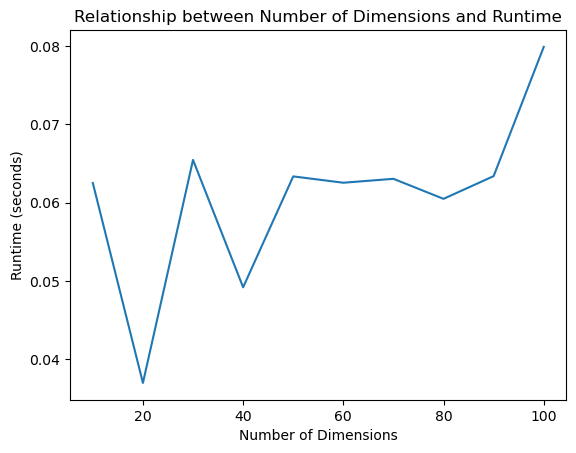

In [17]:
# Define a range of dimensions to test:
dimensions = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Iterate over the dimensions and measure the runtime:
runtimes = []
for n_components in dimensions:
    # Perform PCA to reduce the dimensionality
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    
    # Create the logistic regression model
    logreg = LogisticRegression(solver='lbfgs')
    
    # Measure the runtime of logistic regression fitting
    start_time = time.time()
    logreg.fit(X_train_pca, y_train)
    end_time = time.time()
    
    # Calculate the runtime in seconds
    runtime = end_time - start_time
    runtimes.append(runtime)

#Plot the relationship between the number of dimensions and runtime:
plt.plot(dimensions, runtimes)
plt.xlabel('Number of Dimensions')
plt.ylabel('Runtime (seconds)')
plt.title('Relationship between Number of Dimensions and Runtime')
plt.show()

### Q1-d: List one advantage and one disadvantage of dimensionality reduction:

**Advantage:**

Improved computational efficiency: One of the key advantages of dimensionality reduction is that it can significantly reduce the computational complexity of machine learning algorithms. By reducing the number of features or dimensions in the dataset, the computational resources required for training and inference can be reduced, leading to faster execution times.

**Disadvantage:**

Information loss: Dimensionality reduction techniques can sometimes lead to the loss of valuable information present in the original dataset. When reducing the dimensions, some less important or redundant features may be discarded, but they could still contain useful information for the learning task. Therefore, dimensionality reduction should be applied with caution, as it can potentially lead to a loss of accuracy or predictive power in the model.

### 2- Employ a K-Nearest Neighbour classifier on this dataset:

### Q2-a: Fit a KNN model to this data. What is the accuracy score on the test set?

In [18]:
# Convert DataFrame to NumPy arrays
X_train = train_df.drop('rating', axis=1).values
y_train = train_df['rating'].values
X_test = test_df.drop('rating', axis=1).values
y_test = test_df['rating'].values

# Create the KNN model
knn = KNeighborsClassifier()

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy Score on Test Set:", accuracy)


Accuracy Score on Test Set: 0.648464963674713


### Q2-b: KNN is a computationally expensive model. Reduce the number of observations (data points) in the dataset. What is the relationship between the number of observations and run-time for KNN?

In [21]:
# Select a range of sample sizes
sample_sizes = [100, 500, 1000, 2000, 4000, 8000]

# Initialize a list to store the run-time values
runtimes = []

# Loop over the sample sizes
for size in sample_sizes:
    # Randomly select a subset of data
    subset = train_df.sample(n=size, random_state=42)
    
    # Split the subset into features and target variable
    X = subset.drop('rating', axis=1)
    y = subset['rating']
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create the KNN model
    knn = KNeighborsClassifier()
    
    # Measure the run-time
    start_time = time.time()
    knn.fit(X_train, y_train)
    end_time = time.time()
    runtime = end_time - start_time
    
    # Append the runtime to the list
    runtimes.append(runtime)

# Print the sample sizes and corresponding run-times
for size, runtime in zip(sample_sizes, runtimes):
    print(f"Sample Size: {size}\t Runtime: {runtime:.4f} seconds")


Sample Size: 100	 Runtime: 0.0200 seconds
Sample Size: 500	 Runtime: 0.0180 seconds
Sample Size: 1000	 Runtime: 0.0313 seconds
Sample Size: 2000	 Runtime: 0.0513 seconds
Sample Size: 4000	 Runtime: 0.1003 seconds
Sample Size: 8000	 Runtime: 0.1660 seconds


### Q2-c: List one advantage and one disadvantage of reducing the number of observations.

**Advantage:**

Reduced computational complexity: By reducing the number of observations, the computational requirements of the model decrease, resulting in faster training and prediction times. This can be particularly advantageous when working with large datasets where the original size of the data poses computational limitations.

**Disadvantage:**

Loss of information: Reducing the number of observations may result in a loss of valuable information present in the dataset. By excluding certain data points, the model may not capture the full complexity and diversity of the underlying population, potentially leading to biased or less accurate predictions. It is important to carefully consider the trade-off between computational efficiency and the representativeness of the reduced dataset.


### Q2-d: Use the dataset to find an optimal value for K in the KNN algorithm. You will need to split your dataset into train and validation sets.

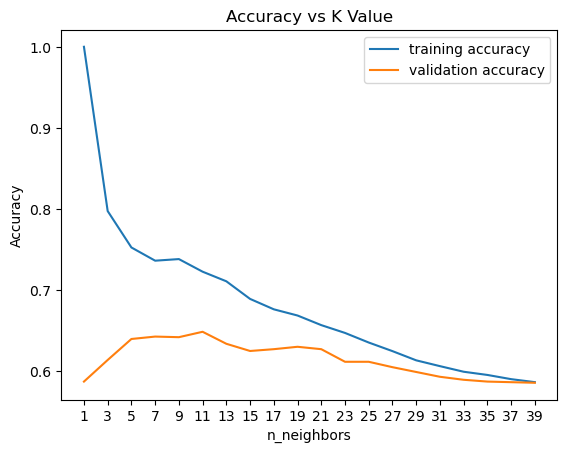

In [30]:
# Split the data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1, stratify=y_train)

# Scale the data
scaler = StandardScaler()
 
# Fit the scaler to the train set
scaler.fit(X_train)
 
# Transform the train and validation set
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Use the split set to find the optimal value for K in the KNN algorithm
training_accuracy = []
validation_accuracy = []

# List of K values to try
neighbors_settings = range(1, 41, 2)

# Loop through the K values on scaled data
for n_neighbors in neighbors_settings:
    
    # Build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, y_train)
    
    # Record the training set accuracy
    training_accuracy.append(knn.score(X_train_scaled, y_train))
    
    # Record the generalization accuracy
    validation_accuracy.append(knn.score(X_val_scaled, y_val))

# Plot the training and validation accuracy
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, validation_accuracy, label='validation accuracy')
plt.title('Accuracy vs K Value')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.xticks(neighbors_settings)
plt.legend()
plt.show()

### Q2-e: What is the issue with splitting the data into train and validation sets after performing vectorization?

Splitting the data into train and validation sets after performing vectorization can introduce a potential issue known as data leakage. Data leakage occurs when information from the validation set unintentionally leaks into the training process, leading to overly optimistic performance estimates and unreliable model evaluation.

Here's why data leakage can happen in this scenario:

Vectorization incorporates knowledge from the entire dataset: When you perform vectorization, you typically transform the data based on the information contained in the entire dataset. This process might involve computing statistics or applying transformations that depend on the full range of data. If you perform vectorization before splitting the data, you unintentionally include information from the validation set in the vectorization process.

Influence on model training: By incorporating information from the validation set into the training process, the model can learn to "memorize" or overfit the validation set. As a result, the model's performance on the validation set will be artificially inflated, giving an optimistic view of its true performance on unseen data.

To mitigate data leakage, it is crucial to split the data into train and validation sets before performing any preprocessing steps, such as vectorization. This ensures that the vectorization process is based solely on the training data, preventing any leakage of information from the validation set.

### 3- Employ a Decision Tree classifier on this dataset:

### Q3-a: Fit a decision tree model to this data. What is the accuracy score on the test set?

In [28]:
# Instantiate the Decision Tree model
tree = DecisionTreeClassifier()

# Fit the model to the scaled train set
tree.fit(X_train, y_train)
 
# Predict the target variable for the scaled test set
y_pred = tree.predict(X_test)
 
# Train and test score
print('Training score of the Decision Tree model: ', tree.score(X_train, y_train))
print('Test score of the Decision Tree model: ', tree.score(X_test, y_test))

Training score of the Decision Tree model:  1.0
Test score of the Decision Tree model:  0.87


### Q3-b: Use the data set (or a subsample) to find an optimal value for the maximum depth of the decision tree. You will need to split your data set into train and validation.

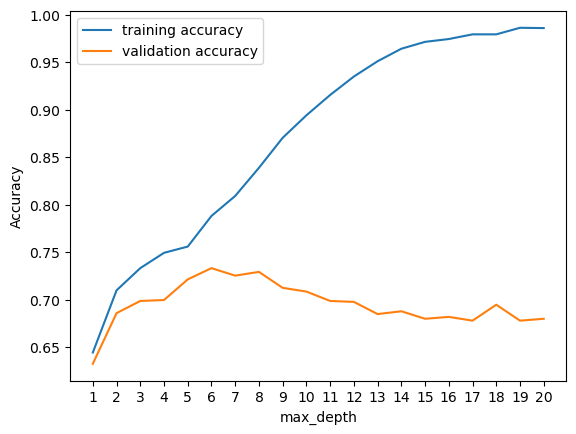

In [31]:
# Split the data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1, stratify=y_train)

# Use the split set to find the optimal value for max_depth in the Decision Tree algorithm
training_accuracy = []
validation_accuracy = []
 
# List of max_depth values to try
max_depth_settings = range(1, 21)
 
# Loop through the max_depth values on scaled data
for max_depth in max_depth_settings:
    
    # Build the model
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X_train, y_train)
    
    # Record the training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    validation_accuracy.append(tree.score(X_val, y_val))
    
# Plot the training and validation accuracy
plt.plot(max_depth_settings, training_accuracy, label='training accuracy')
plt.plot(max_depth_settings, validation_accuracy, label='validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.xticks(max_depth_settings)
plt.legend()
plt.show()

### Q3-c: Provide two advantages of decision trees over KNN. Provide two weaknesses of decision trees (classification or regression trees)

**Advantage:** 

The decision trees are  easier to interpret, AS a they are non-parametric model, which means that they do not make any assumptions about the data. They can fit the data better than KNN, which is a distance based model. Decision trees are also easier to interpret because they are a visual model. This means that we can see the rules that our model is using to make predictions.

**Disadvantage:** 

They are prone to overfitting, and they are not as accurate as KNN. This means that they are not as good at making predictions on new data.

### 4- What is the purpose of the validation set, i.e., how is it different than the test set?
The purpose of the validation set is to test our model on data that it has not seen before. This is different than the test set because the test set is used to test our model on data that it has seen before. This means that the test set is not a good representation of how our model will perform on new data. This is why we should always use a validation set to test our model on data that it has not seen before.

### 5- Re-run a decision tree or logistic regression on the data again:

### Q5-a: Perform a 5-fold cross validation to optimize the hyperparameters of your model.

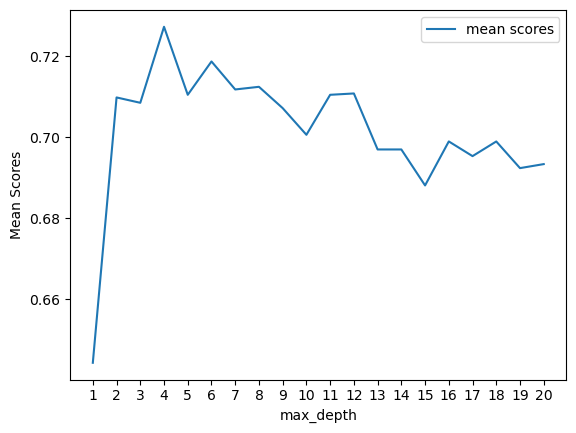

In [34]:
# Perform the 5-fold cross validation scores for the Decision Tree model
max_depth_settings = range(1, 21)
mean_scores = []
 
# Loop over the depth values on scaled data
for max_depth in max_depth_settings:
    
    # Design the Decision Tree model
    tree = DecisionTreeClassifier(max_depth=max_depth)
    
    # Fit the model to 5 folds of the train set
    scores = cross_val_score(tree, X_train, y_train, cv=5)
    
    # Append the mean score to the list
    mean_scores.append(scores.mean())
     
# Plot the mean scores
plt.plot(max_depth_settings, mean_scores, label='mean scores')
plt.ylabel('Mean Scores')
plt.xlabel('max_depth')
plt.xticks(max_depth_settings)
plt.legend()
plt.show()

### Q5-b: What does your confusion matrix look like for your best model on the test set?

In [36]:
# importing the confusion matrix
from sklearn.metrics import confusion_matrix
# importing the classification report
from sklearn.metrics import classification_report

# confusion matrix for the optimized Decision Tree model
y_pred_tree = tree.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_tree)

# plotting the confusion matrix for the optimized Decision Tree model
plt.figure(figsize=(10, 8))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the Decision Tree Model')
plt.show()

# classification report for the optimized Decision Tree model
print(classification_report(y_test, y_pred_tree))

NameError: name 'x_test' is not defined

### 6- Create one new feature of your choice:

### Q6-a: Explain your new feature and why you consider it will improve accuracy.

In [37]:
# combining our train and test data into one dataframe
df = pd.concat([train_set, test_set], axis=0)

# checking results
df.shape
# creating a new feature called 'season' based on the 'month_of_review' feature
df['season'] = df['month_of_review'].apply(lambda x: 'winter' if x in [12, 1, 2] 
                                           else ('spring' if x in [3, 4, 5] 
                                                 else ('summer' if x in [6, 7, 8] 
                                                       else 'fall')))

# checking results
df.value_counts('season')
# using get_dummies to create dummy variables for the 'hotel_quality' feature
df = pd.get_dummies(df, columns=['season'], drop_first=True)
 
# checking results
df.head()

NameError: name 'train_set' is not defined

### Q6-b: Run the model from question 5 again. You will have to re-optimize your hyperparameters. Has the accuracy score of your best model improved on the test set after adding the new feature you created?